# Titanic

## Preprocessing

In [1]:
import pandas as pd               
import numpy as np          
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test = pd.read_csv('test.csv')

In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train['Cabin'][~train['Cabin'].isna()]

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [8]:
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


### Płeć

In [9]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Kolumna ticket

In [11]:
train.drop(['Ticket'], axis=1, inplace=True)

In [12]:
test.drop(['Ticket'], axis=1, inplace=True)

### Embarked

In [13]:
data = train

In [14]:
data['Embarked'].loc[data['Embarked'].isna()] = 'S'

C:\Users\Szymon\AppData\Local\Temp\ipykernel_15120\1178900561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'].loc[data['Embarked'].isna()] = 'S'


In [15]:
data['Embarked'].isna().sum()

0

In [16]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [17]:
data[['Emb_1','Emb_2', 'Emb_3']] = one_hot_encoder.fit_transform(data['Embarked'].values.reshape(-1,1))

In [18]:
data.drop(['Embarked'], axis=1, inplace=True)

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_1,Emb_2,Emb_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,NaN,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,B42,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,NaN,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C148,1.0,0.0,0.0


In [20]:
data = test
data['Embarked'].loc[data['Embarked'].isna()] = 'S'
print(data['Embarked'].isna().sum())
one_hot_encoder = OneHotEncoder(sparse_output=False)
data[['Emb_1','Emb_2', 'Emb_3']] = one_hot_encoder.fit_transform(data['Embarked'].values.reshape(-1,1))
data.drop(['Embarked'], axis=1, inplace=True)
data

0


C:\Users\Szymon\AppData\Local\Temp\ipykernel_15120\3772398596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'].loc[data['Embarked'].isna()] = 'S'


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_1,Emb_2,Emb_3
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,NaN,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,NaN,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,NaN,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,NaN,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,NaN,0.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C105,1.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,NaN,0.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,NaN,0.0,0.0,1.0


### Cabin

In [21]:
data = train

In [22]:
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if type(x) == str else '0')

In [23]:
from sklearn import preprocessing
le = preprocessing.OrdinalEncoder(categories=[['0', 'T', 'A', 'B', 'C', 'D', 'E', 'F', 'G']])

In [24]:
data['Cabin'] = le.fit_transform(data['Cabin'].values.reshape(-1,1))

In [25]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_1,Emb_2,Emb_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,4.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,4.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,3.0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,0.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,4.0,1.0,0.0,0.0


In [26]:
data = test
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if type(x) == str else '0')
le = preprocessing.OrdinalEncoder(categories=[['0', 'T', 'A', 'B', 'C', 'D', 'E', 'F', 'G']])
data['Cabin'] = le.fit_transform(data['Cabin'].values.reshape(-1,1))
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_1,Emb_2,Emb_3
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0.0,0.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,4.0,1.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0.0,0.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0.0,0.0,0.0,1.0


### Name

In [27]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_1,Emb_2,Emb_3
0,1,0,3,1,22.0,1,0,7.2500,0.0,0.0,0.0,1.0
1,2,1,1,0,38.0,1,0,71.2833,4.0,1.0,0.0,0.0
2,3,1,3,0,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,4,1,1,0,35.0,1,0,53.1000,4.0,0.0,0.0,1.0
4,5,0,3,1,35.0,0,0,8.0500,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.0,0.0,0.0,1.0
887,888,1,1,0,19.0,0,0,30.0000,3.0,0.0,0.0,1.0
888,889,0,3,0,NaN,1,2,23.4500,0.0,0.0,0.0,1.0
889,890,1,1,1,26.0,0,0,30.0000,4.0,1.0,0.0,0.0


In [29]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Emb_1,Emb_2,Emb_3
0,892,3,1,34.5,0,0,7.8292,0.0,0.0,1.0,0.0
1,893,3,0,47.0,1,0,7.0000,0.0,0.0,0.0,1.0
2,894,2,1,62.0,0,0,9.6875,0.0,0.0,1.0,0.0
3,895,3,1,27.0,0,0,8.6625,0.0,0.0,0.0,1.0
4,896,3,0,22.0,1,1,12.2875,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,0.0,0.0,0.0,1.0
414,1306,1,0,39.0,0,0,108.9000,4.0,1.0,0.0,0.0
415,1307,3,1,38.5,0,0,7.2500,0.0,0.0,0.0,1.0
416,1308,3,1,NaN,0,0,8.0500,0.0,0.0,0.0,1.0


Uwaga. W Age ciągle są missing data, ale zajmiemy się nimi przy konkretnych algorytmach

# Klasyfikator
Przyjęta strategia to voting trzech najlepszych dotychczasowych klasyfikatorów

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_valid,y_train,y_valid=train_test_split(train.loc[:, train.columns != 'Survived'],train['Survived'],random_state=42, test_size=0.10, stratify=train['Survived'])

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [32]:
preprocessor = Pipeline(
    [
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('scaler', StandardScaler())
    ])

## SVM

In [33]:
from sklearn.svm import SVC

In [34]:
svm = Pipeline([('preprocessing', preprocessor), 
                 ('classifier', SVC(kernel = 'rbf', C=1.1, random_state = 0))])

In [35]:
svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classifier', SVC(C=1.1, random_state=0))])

## xgboost

In [36]:
from xgboost import XGBClassifier

In [37]:
xgb = Pipeline([('pre', preprocessor), ('clf', XGBClassifier(**{'learning_rate': 1,
 'max_depth': 5,
 'n_estimators': 5}))])

In [38]:
xgb.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=5,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

## Neural network

In [39]:
from tensorflow import keras

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

from keras.callbacks import History

In [41]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(300,activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(50,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               3600      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5

In [42]:
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_valid_transformed = preprocessor.transform(X_valid)

In [43]:
history = model.fit(X_train_transformed, y_train, validation_data= (X_valid_transformed, y_valid), batch_size=32, epochs=30)

Epoch 1/30
26/26 [==============================] - 4s 31ms/step - loss: 0.5583 - accuracy: 0.7278 - val_loss: 0.5113 - val_accuracy: 0.7333
Epoch 2/30
26/26 [==============================] - 0s 11ms/step - loss: 0.4396 - accuracy: 0.8190 - val_loss: 0.4490 - val_accuracy: 0.8000
Epoch 3/30
26/26 [==============================] - 0s 11ms/step - loss: 0.4132 - accuracy: 0.8327 - val_loss: 0.4522 - val_accuracy: 0.8111
Epoch 4/30
26/26 [==============================] - 0s 11ms/step - loss: 0.4056 - accuracy: 0.8340 - val_loss: 0.4716 - val_accuracy: 0.8000
Epoch 5/30
26/26 [==============================] - 0s 11ms/step - loss: 0.4079 - accuracy: 0.8277 - val_loss: 0.4888 - val_accuracy: 0.7889
Epoch 6/30
26/26 [==============================] - 0s 11ms/step - loss: 0.3864 - accuracy: 0.8414 - val_loss: 0.4484 - val_accuracy: 0.8111
Epoch 7/30
26/26 [==============================] - 0s 11ms/step - loss: 0.3766 - accuracy: 0.8452 - val_loss: 0.4542 - val_accuracy: 0.8222
Epoch 8/30
26

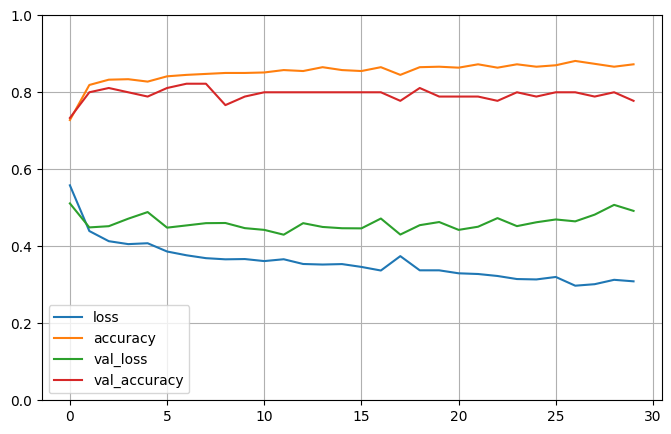

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Voting

Przewiduję klasy dla sieci neuronowej

In [45]:
predictions = (model.predict(preprocessor.transform(test)) > 0.5).astype("int32")

14/14 [==============================] - 0s 4ms/step


Hard voting

In [46]:
out = (((predictions.flatten()+svm.predict(test)+xgb.predict(test))/3) > 0.5).astype("int32")

Export do csv

In [47]:
df = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':out})
df.to_csv('custom_voting.csv', index=False)

Sprawdzenie wyniku na valid

In [48]:
predictions = (model.predict(X_valid_transformed) > 0.5).astype("int32")
out = (((predictions.flatten()+svm.predict(X_valid)+xgb.predict(X_valid))/3) > 0.5).astype("int32")
accuracy_score(out, y_valid)

3/3 [==============================] - 0s 5ms/step


0.8222222222222222